In [1]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandasgui import show

In [2]:
data = pd.read_csv('data/AviationDataEnd2016UP.csv', encoding='latin-1')

In [3]:
data.shape

(79293, 31)

In [4]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20170103X43747,Accident,WPR17LA046,2017-01-03,"Paradise, MT",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,2.0,NaN,NaN,VMC,CRUISE,Preliminary,05/01/2017
1,20161230X55950,Accident,WPR17FA044,2016-12-29,"Dabob, WA",United States,47.823611,-122.790000,NaN,NaN,...,Personal,NaN,4.0,NaN,NaN,NaN,VMC,NaN,Preliminary,05/01/2017
2,20161229X93022,Accident,CEN17LA062,2016-12-27,"Piedmont, MO",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,LANDING,Preliminary,03/01/2017
3,20161227X80237,Accident,CEN17LA061,2016-12-27,"Farmington, MO",United States,37.761111,-90.428611,FAM,FARMINGTON RGNL,...,Personal,NaN,NaN,NaN,1.0,1.0,VMC,TAKEOFF,Preliminary,29/12/2016
4,20161226X80840,Accident,WPR17FA041,2016-12-26,"Fresno, CA",United States,36.844444,-119.870834,E79,Sierra Sky Park,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,05/01/2017


In [5]:
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
gui  = show(data)

PandasGUI WARNING — pandasgui.utility — In data, converted columns to datetime: Event.Date, Publication.Date


In [7]:
# create a sub dataframe with the selected columns needed for analysis

df = data[['Event.Date', 'Location',  'Injury.Severity',  'Aircraft.Damage','Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition' ]]

In [8]:
# rename the columns by remvoing the space and capital letters

df.columns = ['event_date', 'location', 'injury_severity', 
              'aircraft_damage', 'make', 'model', 
              'amateur_build', 'number_of_engines', 'engine_type',
              'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',
              'total_uninjured', 'weather_conditions'
             ]

In [9]:
df.shape

(79293, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79293 entries, 0 to 79292
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_date              79293 non-null  object 
 1   location                79215 non-null  object 
 2   injury_severity         79293 non-null  object 
 3   aircraft_damage         76883 non-null  object 
 4   make                    79204 non-null  object 
 5   model                   79175 non-null  object 
 6   amateur_build           78721 non-null  object 
 7   number_of_engines       75175 non-null  float64
 8   engine_type             75919 non-null  object 
 9   total_fatal_injuries    55984 non-null  float64
 10  total_serious_injuries  53742 non-null  float64
 11  total_minor_injuries    54833 non-null  float64
 12  total_uninjured         66949 non-null  float64
 13  weather_conditions      77136 non-null  object 
dtypes: float64(5), object(9)
memory usage:

In [11]:
#statistics on numerical data
df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,75175.000000,55984.000000,53742.000000,54833.000000,66949.000000
mean,1.148055,0.814679,0.317703,0.502581,5.790886
std,0.453847,6.233700,1.372924,2.781994,29.223016
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,2.000000
max,18.000000,349.000000,111.000000,380.000000,699.000000


In [12]:
df.isnull().sum()

event_date                    0
location                     78
injury_severity               0
aircraft_damage            2410
make                         89
model                       118
amateur_build               572
number_of_engines          4118
engine_type                3374
total_fatal_injuries      23309
total_serious_injuries    25551
total_minor_injuries      24460
total_uninjured           12344
weather_conditions         2157
dtype: int64

In [13]:
#sort by ascending date
df = df.sort_values(by='event_date', ascending=True, na_position='first')

In [14]:
gui = show(df)

PandasGUI WARNING — pandasgui.utility — In df, converted columns to datetime: event_date


In [15]:
#begin to look for unique categories

df.aircraft_damage.unique()

array(['Destroyed', 'Substantial', 'Minor', nan], dtype=object)

In [16]:
df.engine_type.unique()

array(['Reciprocating', nan, 'Turbo Shaft', 'Unknown', 'Turbo Fan',
       'Turbo Prop', 'Turbo Jet', 'REC, TJ, TJ', 'TJ, REC, REC, TJ',
       'REC, TJ, REC, TJ', 'TF, TJ', 'None', 'Electric', 'Hybrid Rocket',
       'REC, ELEC'], dtype=object)

In [17]:
df.make.unique()

array(['STINSON', 'PIPER', 'Cessna', ..., 'PETRUS DAVID WAYNE', 'MEAD',
       'SOFTEX INVEST LLC'], dtype=object)

In [18]:
df.weather_conditions.unique()

array(['UNK', 'IMC', 'VMC', nan], dtype=object)

In [19]:
df.injury_severity.unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [20]:
#124 Fatal accidents

len(df.injury_severity.unique())

124

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='aircraft_damage', ylabel='count'>

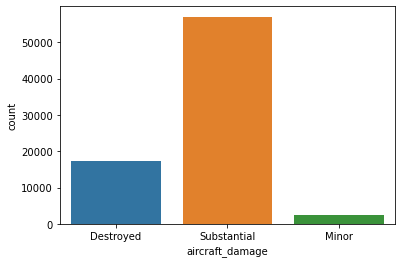

In [21]:
#Visualize the count of types of damage

sns.countplot(df['aircraft_damage'],label="Count")

In [22]:
df.event_date.unique()

array(['1948-10-24', '1962-07-19', '1974-08-30', ..., '2016-12-27',
       '2016-12-29', '2017-01-03'], dtype=object)

In [23]:
df['event_date']

79292    1948-10-24
79291    1962-07-19
79290    1974-08-30
79289    1977-06-19
79288    1979-08-02
            ...    
4        2016-12-26
3        2016-12-27
2        2016-12-27
1        2016-12-29
0        2017-01-03
Name: event_date, Length: 79293, dtype: object

In [24]:
#Convert to Pandas datetime

converted_date = df['event_date'] = pd.to_datetime(df.event_date)

In [25]:
#pull the year from the event date column and create a new years column

df['event_date'].dt.year
df['year'] = df['event_date'].dt.year
df.head()

,event_date,location,injury_severity,aircraft_damage,make,model,amateur_build,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_conditions,year
79292,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,STINSON,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,1948
79291,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,PIPER,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,1962
79290,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,1974
79289,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,1977
79288,1979-08-02,"Canton, OH",Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,NaN,VMC,1979


In [26]:
len(df['year'])

79293

Text(0.5, 1.0, 'Fatal injuries vs Year')

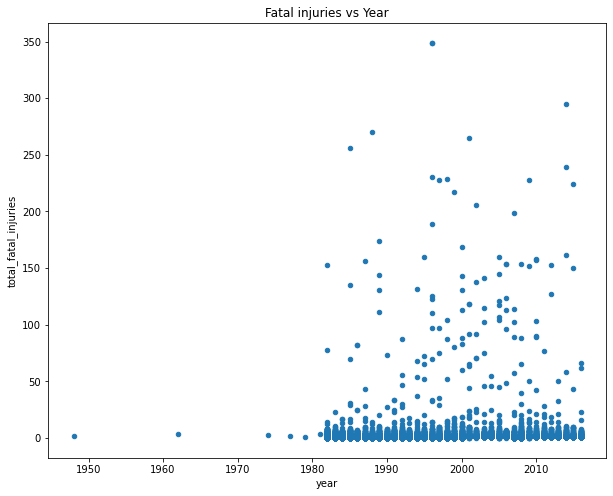

In [27]:
#Plot yearly fatal injuries

df.plot(kind='scatter', x='year', y='total_fatal_injuries', figsize=(10,8))
plt.title("Fatal injuries vs Year")


In [ ]:
df['make'].unique().tolist()

In [51]:
len(df['make'].unique().tolist())


7476

In [ ]:
df['test2'] = df['make'].unique()

In [64]:
df['test2'] = df['make'].drop_duplicates()

In [65]:
df.head()

,event_date,location,injury_severity,aircraft_damage,make,model,amateur_build,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_conditions,year,make_unique,test1,test2
79292,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,STINSON,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,1948,<bound method Series.unique of 79292 ...,NaN,STINSON
79291,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,PIPER,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,1962,<bound method Series.unique of 79292 ...,NaN,PIPER
79290,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,1974,<bound method Series.unique of 79292 ...,NaN,Cessna
79289,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,1977,<bound method Series.unique of 79292 ...,NaN,Rockwell
79288,1979-08-02,"Canton, OH",Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,NaN,VMC,1979,<bound method Series.unique of 79292 ...,NaN,NaN


In [67]:
df.drop(columns=['make_unique', 'test1'])
df.head()

,event_date,location,injury_severity,aircraft_damage,make,model,amateur_build,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_conditions,year,make_unique,test1,test2
79292,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,STINSON,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,1948,<bound method Series.unique of 79292 ...,NaN,STINSON
79291,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,PIPER,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,1962,<bound method Series.unique of 79292 ...,NaN,PIPER
79290,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,1974,<bound method Series.unique of 79292 ...,NaN,Cessna
79289,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,1977,<bound method Series.unique of 79292 ...,NaN,Rockwell
79288,1979-08-02,"Canton, OH",Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,NaN,VMC,1979,<bound method Series.unique of 79292 ...,NaN,NaN


In [69]:
gui  = show(df)

In [ ]:
df.plot(kind='bar', x='test2')

In [ ]:
#make to-do: clean text first(spaces, caps, etc), new column with drop.duplicates